In [449]:
import pandas as pd
import numpy as np

In [450]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [451]:
df_all_feats = pd.read_csv("data/mlb_data_gsr_final.csv")

In [452]:
econ = pd.read_csv("data/econ_data_map.csv")

In [453]:
econ = econ[~ econ.duplicated()]

In [454]:
df_all_feats = df_all_feats.merge(econ , how = 'left', on = ['HomeTeam', 'year'])

In [455]:
df_all_feats.isnull().sum()

percent_fill           0
Attendance             2
NonRegular_ParkFlag    0
parks_per_team         0
park_cap               0
                      ..
avg_fill_HomeTeam      0
MIN_played             0
cpi                    0
unemp                  0
population             0
Length: 86, dtype: int64

In [456]:
df_all_feats

,percent_fill,Attendance,NonRegular_ParkFlag,parks_per_team,park_cap,DayFlag,DayofMonth,total_wins_visiting,total_wins_home,league_match_flag,...,home_div,visiting_div,Holidays_that_day,parkid,year,avg_fill_HomeTeam,MIN_played,cpi,unemp,population
0,100.000000,55000.0,1,3,55000,0,29,1,0,0,...,NL_EAST,NL_CENTRAL,no_hols,TOK01,2000,66.093116,0,167.5,5.1,8020000.0
1,100.000000,55000.0,1,2,55000,0,30,1,1,0,...,NL_CENTRAL,NL_EAST,no_hols,TOK01,2000,85.834627,0,168.8,4.2,2891582.0
2,61.146242,35101.0,0,4,57405,0,3,0,1,0,...,NL_EAST,NL_WEST,no_hols,MIA01,2000,37.232702,0,159.7,4.7,362470.0
3,92.682235,52308.0,0,3,56438,1,3,0,2,0,...,NL_EAST,NL_WEST,no_hols,NYC17,2000,66.093116,0,167.5,5.1,8020000.0
4,95.228302,48156.0,0,2,50569,1,3,1,1,1,...,NL_CENTRAL,NL_CENTRAL,no_hols,STL09,2000,82.284737,0,163.5,4.2,348189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53442,72.249691,28056.0,0,2,38832,1,5,99,68,0,...,AL_WEST,AL_EAST,no_hols,ARL03,2022,61.103819,0,282.9,5.6,8994374.0
53443,61.390725,27298.0,0,3,44466,1,5,55,101,1,...,NL_EAST,NL_EAST,no_hols,NYC20,2022,66.093116,0,313.7,10.0,8470000.0
53444,40.601065,18765.0,0,2,46218,1,5,74,86,0,...,NL_CENTRAL,NL_WEST,no_hols,MIL06,2022,66.509644,0,303.8,7.8,556380.0
53445,34.615076,17248.0,0,2,49828,1,5,92,83,1,...,AL_EAST,AL_EAST,no_hols,BAL12,2022,53.176585,0,374.3,6.0,574085.0


In [457]:
man_factors = ['year', 'month_of_year']

for col in man_factors:
    df_all_feats[col] = df_all_feats[col].astype(object)

In [458]:
arima_df = df_all_feats[(df_all_feats['HomeTeam'] == 'MIN')]

arima_df.drop(['HomeTeam', 'home_div', 'Attendance' ,'parks_per_team'], axis = 1, inplace = True)

C:\Users\egsra\AppData\Local\Temp\ipykernel_13904\1362800324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arima_df.drop(['HomeTeam', 'home_div', 'Attendance' ,'parks_per_team'], axis = 1, inplace = True)


In [459]:
arima_df = arima_df[arima_df['year'] > 2000]

In [460]:
arima_df.dropna(inplace = True)

In [461]:
arima_df.columns

Index(['percent_fill', 'NonRegular_ParkFlag', 'park_cap', 'DayFlag',
       'DayofMonth', 'total_wins_visiting', 'total_wins_home',
       'league_match_flag', 'covid_effect', 'park_age', 'LengthofGame',
       'visiting_top_salary', 'HomeTeamScore', 'VistingTeamScore',
       'HomeTeamGameNumber', 'VisitingTeamGameNumber', 'NumberofGames',
       'NumberofOuts', 'home_top_salary', 'HomeTeamPitchers_TeamEarnedRuns-3',
       'HomeTeamOffense_Strickouts_last_year',
       'HomeTeamPitchers_TeamEarnedRuns-1', 'Homeday_league_rank',
       'HomeTeamPitchers_TeamEarnedRuns-2',
       'HomeTeamPitchers_TeamEarnedRuns-7',
       'HomeTeamPitchers_TeamEarnedRuns_last_year',
       'HomeTeamPitchers_TeamEarnedRuns-6',
       'HomeTeamPitchers_TeamEarnedRuns-5',
       'HomeTeamPitchers_TeamEarnedRuns-4', 'HomeTeamScore_last_year',
       'Homeday_league_rank_last_year',
       'VisitingTeamOffense_Strickouts_last_year', 'Homewin_rate_last_year',
       'VisitingAttendance_last_year',
       'V

In [462]:
arima_df.shape

(1702, 82)

In [463]:
cols = arima_df.dtypes.index
dtypes = arima_df.dtypes.values

In [464]:
cat_cols = cols[np.where(dtypes == 'object')]

In [465]:
cat_features = pd.get_dummies(arima_df[cat_cols], drop_first = True)

C:\Users\egsra\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [466]:
num_cols = cols[np.where(dtypes != 'object')][cols[np.where(dtypes != 'object')] != 'percent_fill']

In [467]:
num_features = arima_df[num_cols]

In [468]:
x = pd.concat([num_features, cat_features], axis = 1)

In [469]:
x.shape

(1702, 150)

In [470]:
x.corr()[x.corr() > 0.9].isna().sum(axis = 1)

NonRegular_ParkFlag    148
park_cap               148
DayFlag                149
DayofMonth             149
total_wins_visiting    146
                      ... 
year_2017              149
year_2018              149
year_2019              149
year_2021              149
year_2022              149
Length: 150, dtype: int64

In [471]:
x.corr()

,NonRegular_ParkFlag,park_cap,DayFlag,DayofMonth,total_wins_visiting,total_wins_home,league_match_flag,covid_effect,park_age,LengthofGame,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2021,year_2022
NonRegular_ParkFlag,1.000000,-0.148140,-0.025244,0.006778,-0.044890,-0.047294,0.037159,-0.010887,0.014515,0.096573,...,-0.007667,-0.007667,-0.007667,-0.007667,-0.007667,-0.007667,0.153440,-0.007667,-0.007667,-0.007667
park_cap,-0.148140,1.000000,-0.081853,-0.046713,-0.027047,0.098502,-0.006378,-0.270856,0.921865,-0.279400,...,-0.190759,-0.190759,-0.190759,-0.190759,-0.190759,-0.190759,-0.209887,-0.190759,-0.190759,-0.190759
DayFlag,-0.025244,-0.081853,1.000000,-0.033027,-0.051247,-0.061118,0.007141,0.025778,-0.077889,0.058648,...,0.014686,0.003125,0.026248,0.032029,0.020467,0.020467,0.008906,-0.002656,0.020467,0.014686
DayofMonth,0.006778,-0.046713,-0.033027,1.000000,0.064941,0.052866,0.030223,0.039161,-0.046016,-0.008234,...,0.061333,0.015364,-0.015806,0.005919,-0.015806,-0.018010,-0.011398,0.018513,0.032996,0.019458
total_wins_visiting,-0.044890,-0.027047,-0.051247,0.064941,1.000000,0.908284,0.120049,0.001125,-0.042769,0.031487,...,0.004749,0.027556,0.026974,0.006029,0.010683,-0.019338,-0.020385,0.002538,0.019643,-0.027484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year_2017,-0.007667,-0.190759,0.020467,-0.018010,-0.019338,-0.010611,-0.001461,-0.070950,-0.148830,0.122896,...,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,1.000000,-0.049969,-0.049969,-0.049969,-0.049969
year_2018,0.153440,-0.209887,0.008906,-0.011398,-0.020385,-0.029522,0.004076,-0.070950,-0.119078,0.093424,...,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,1.000000,-0.049969,-0.049969,-0.049969
year_2019,-0.007667,-0.190759,-0.002656,0.018513,0.002538,0.094878,0.004076,-0.070950,-0.100145,0.151403,...,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,1.000000,-0.049969,-0.049969
year_2021,-0.007667,-0.190759,0.020467,0.032996,0.019643,-0.058571,-0.001461,0.823550,-0.051460,0.095163,...,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,-0.049969,1.000000,-0.049969


In [472]:
x.corr()[x.corr() > 0.9].isna().sum(axis = 1)[x.corr()[x.corr() > 0.9].isna().sum(axis = 1) < x.shape[1]-1]

NonRegular_ParkFlag                  148
park_cap                             148
total_wins_visiting                  146
total_wins_home                      146
park_age                             148
HomeTeamGameNumber                   146
VisitingTeamGameNumber               146
HomeTeamPitchers_TeamEarnedRuns-7    148
HomeTeamPitchers_TeamEarnedRuns-6    147
HomeTeamPitchers_TeamEarnedRuns-5    147
HomeTeamPitchers_TeamEarnedRuns-4    148
HomeTeamOffense_Strickouts-7         147
home_payroll                         147
HomeTeamOffense_Strickouts-6         147
HomeTeamOffense_Homeruns-5           147
HomeTeamOffense_Strickouts-4         147
tavg                                 147
tmin                                 148
tmax                                 148
HomeTeamOffense_Strickouts-5         146
HomeTeamOffense_Homeruns-4           148
HomeTeamOffense_Homeruns-6           147
HomeTeamOffense_Homeruns-7           148
HomeTeamOffense_Strickouts-3         148
cpi             

In [473]:
x.isin([np.inf, -np.inf]).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [474]:
arima_df['percent_fill'].isin([np.inf, -np.inf]).sum()

0

In [475]:
arima_df['percent_fill'].isna().sum()

0

### Removing specific columns

In [476]:
x.columns.to_list()

['NonRegular_ParkFlag',
 'park_cap',
 'DayFlag',
 'DayofMonth',
 'total_wins_visiting',
 'total_wins_home',
 'league_match_flag',
 'covid_effect',
 'park_age',
 'LengthofGame',
 'visiting_top_salary',
 'HomeTeamScore',
 'VistingTeamScore',
 'HomeTeamGameNumber',
 'VisitingTeamGameNumber',
 'NumberofGames',
 'NumberofOuts',
 'home_top_salary',
 'HomeTeamPitchers_TeamEarnedRuns-3',
 'HomeTeamOffense_Strickouts_last_year',
 'HomeTeamPitchers_TeamEarnedRuns-1',
 'Homeday_league_rank',
 'HomeTeamPitchers_TeamEarnedRuns-2',
 'HomeTeamPitchers_TeamEarnedRuns-7',
 'HomeTeamPitchers_TeamEarnedRuns_last_year',
 'HomeTeamPitchers_TeamEarnedRuns-6',
 'HomeTeamPitchers_TeamEarnedRuns-5',
 'HomeTeamPitchers_TeamEarnedRuns-4',
 'HomeTeamScore_last_year',
 'Homeday_league_rank_last_year',
 'VisitingTeamOffense_Strickouts_last_year',
 'Homewin_rate_last_year',
 'VisitingAttendance_last_year',
 'VisitingTeamOffense_Homeruns_last_year',
 'HomeTeamOffense_Strickouts-7',
 'VisitingTeamPitchers_TeamEarnedRu

In [477]:
remove_cols = ['HomeTeamOffense_Homeruns-1',
       'HomeTeamOffense_Homeruns-2', 'HomeTeamOffense_Homeruns-3',
       'HomeTeamOffense_Homeruns-4', 'HomeTeamOffense_Homeruns-5',
       'HomeTeamOffense_Homeruns-6', 'HomeTeamOffense_Homeruns-7',
       'HomeTeamOffense_Homeruns_last_year', 'HomeTeamOffense_Strickouts-1',
       'HomeTeamOffense_Strickouts-2', 'HomeTeamOffense_Strickouts-3',
       'HomeTeamOffense_Strickouts-4', 'HomeTeamOffense_Strickouts-5',
       'HomeTeamOffense_Strickouts-6', 'HomeTeamOffense_Strickouts-7',
       'HomeTeamOffense_Strickouts_last_year',
       'HomeTeamPitchers_TeamEarnedRuns-1',
       'HomeTeamPitchers_TeamEarnedRuns-2',
       'HomeTeamPitchers_TeamEarnedRuns-3',
       'HomeTeamPitchers_TeamEarnedRuns-4',
       'HomeTeamPitchers_TeamEarnedRuns-5',
       'HomeTeamPitchers_TeamEarnedRuns-6',
       'HomeTeamPitchers_TeamEarnedRuns-7',
       'HomeTeamPitchers_TeamEarnedRuns_last_year', 'tmin', 'tmax', 'park_cap', 'pres', 'wspd',
               'NumberofOuts','VisitingTeamOffense_Homeruns_last_year',
 'VisitingTeamOffense_Strickouts_last_year',
 'VisitingTeamPitchers_TeamEarnedRuns_last_year', 'VisitingTeamGameNumber', 'total_wins_visiting', 'total_wins_home',
             #'nhl_season_flag',
            ### Use nhl and nba flags separately
               'parks_per_team', 'NonRegular_ParkFlag',
               'LengthofGame',
               #'HomeTeamScore', 'VisitingTeamScore',
               #'HomeTeamScore_last_year', 'VisitingTeamScore_last_year',
               #'visiting_top_salary', 'home_top_salary',
               #'Visitingwin_rate',
               #'Homewin_rate',
             #'Visitingwin_rate_last_year',
             #'VistingTeamScore_last_year',
              #'HomeTeamScore_last_year',
               # 'Homewin_rate_last_year'
               'month_of_year_4',
                 'month_of_year_5',
                 'month_of_year_6',
                 'month_of_year_7',
                 'month_of_year_8',
                 'month_of_year_9',
                 'month_of_year_10',
               
              ]

In [478]:
req_cols_2 = [col for col in x.columns if col not in remove_cols]

In [479]:
x1 = x[req_cols_2]

In [480]:
x1.shape

(1702, 105)

In [481]:
x1.isin([np.inf, -np.inf]).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [482]:
x1.corr()[x1.corr() > 0.8].isna().sum(axis = 1)[x1.corr()[x1.corr() > 0.8].isna().sum(axis = 1) < x1.shape[1]-1]

covid_effect       103
home_payroll       101
nba_season_flag    103
nhl_season_flag    103
cpi                101
population         101
parkid_MIN04       101
year_2021          103
dtype: int64

In [483]:
x1.corr()['cpi'].sort_values(ascending = False)

cpi                             1.000000
population                      0.999810
home_payroll                    0.928324
parkid_MIN04                    0.851441
covid_effect                    0.526985
                                  ...   
VisitingAttendance_last_year   -0.390618
Homewin_rate_last_year         -0.414169
park_age                       -0.612240
avg_fill_HomeTeam                    NaN
MIN_played                           NaN
Name: cpi, Length: 105, dtype: float64

In [484]:
#pd.concat([arima_df['Attendance'], x1], axis = 1).to_csv('data/mlb_data_gsr_v0.7.csv', index = False)

In [485]:
arima_df['percent_fill'].isin([np.inf, -np.inf]).sum()

0

In [486]:
arima_df['percent_fill'].isna().sum()

0

### SARIMAX

In [487]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [488]:
y = arima_df['percent_fill']

In [489]:
adfuller(y)

(-3.360149263578721,
 0.01239475807232267,
 24,
 1677,
 {'1%': -3.4342553892578462,
  '5%': -2.8632650083386295,
  '10%': -2.5676883512313102},
 12962.460157399313)

<AxesSubplot:>

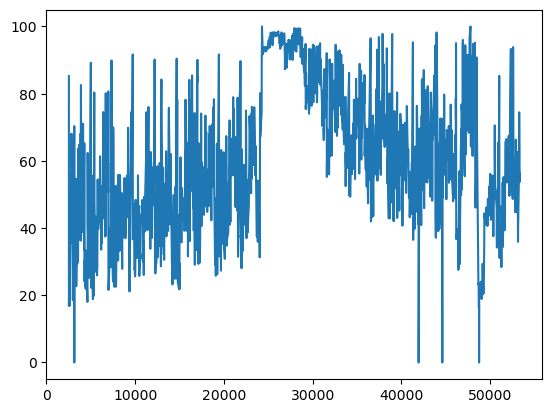

In [490]:
y.plot()

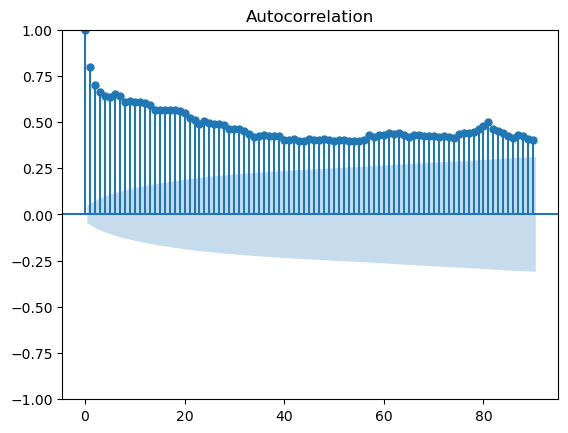

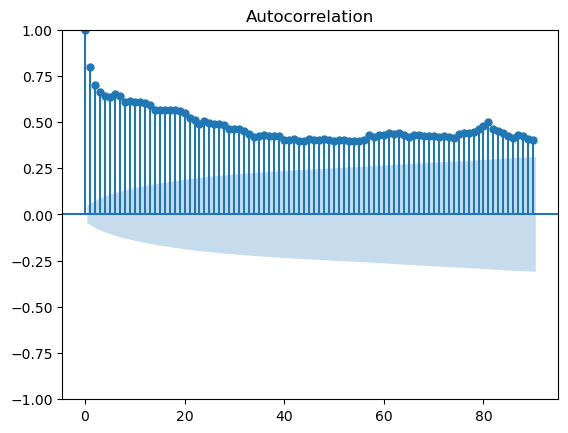

In [491]:
plot_acf(y, lags = 90)

C:\Users\egsra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


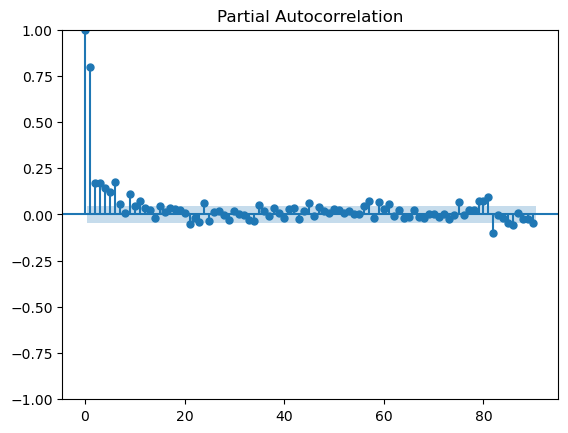

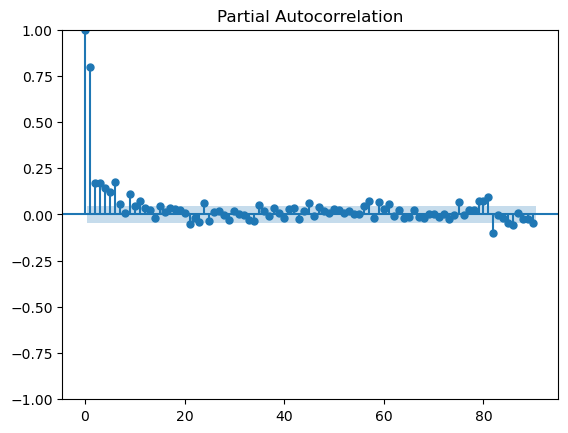

In [492]:
plot_pacf(y, lags = 90)

In [493]:
arima_df['Holidays_that_day'].unique()

array(['no_hols', 'Independence Day', 'Labor Day', 'Memorial Day',
       'Independence Day (Observed)'], dtype=object)

In [494]:
ts_model = SARIMAX(endog = y, exog = x1, order = (2,1,1),  seasonal_order=(1, 0, 1, 81)).fit()

ts_model.summary()

C:\Users\egsra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\egsra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\egsra\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       percent_fill   No. Observations:                 1702
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 81)   Log Likelihood               -6229.205
Date:                            Fri, 24 Mar 2023   AIC                          12680.410
Time:                                    20:42:05   BIC                          13284.136
Sample:                                         0   HQIC                         12903.904
                                           - 1702                                         
Covariance Type:                              opg                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
DayFlag                                                               0.1167      0.005     22.600      0.000       0.107       0.127
DayofMonth                                                            0.0540      0.038      1.414      0.157      -0.021       0.129
league_match_flag                                                    -1.0443      0.003   -384.443      0.000      -1.050      -1.039
covid_effect                                                         -5.0822      0.002  -2167.713      0.000      -5.087      -5.078
park_age                                                              3.8988      0.046     85.046      0.000       3.809       3.989
visiting_top_salary                                                  -0.0118      0.011     -1.114      0.265      -0.033       0.009
HomeTeamScore                                                        -0.1109      0.076     -1.465      0.143      -0.259       0.037
VistingTeamScore                                                      0.0234      0.070      0.335      0.737      -0.113       0.160
HomeTeamGameNumber                                                   -0.0270      0.041     -0.659      0.510      -0.107       0.053
NumberofGames                                                        -0.3104      0.001   -267.413      0.000      -0.313      -0.308
home_top_salary                                                      -0.0312      0.062     -0.503      0.615      -0.153       0.090
Homeday_league_rank                                                   0.7479      0.218      3.432      0.001       0.321       1.175
HomeTeamScore_last_year                                               0.0101      0.028      0.354      0.723      -0.046       0.066
Homeday_league_rank_last_year                                        -3.7228      0.077    -48.511      0.000      -3.873      -3.572
Homewin_rate_last_year                                                0.9538        nan        nan        nan         nan         nan
VisitingAttendance_last_year                                          0.0004      0.000      1.831      0.067   -2.72e-05       0.001
Visitingday_league_rank                                               0.1114      0.187      0.595      0.552      -0.256       0.478
Visitingday_league_rank_last_year                                    -0.3263      0.088     -3.690      0.000      -0.500      -0.153
Visitingwin_rate                                                     -5.6781      0.013   -441.950      0.000      -5.703      -5.653
Visitingwin_rate_last_year                                            1.1629      0.003    364.287      0.000       1.157       1.169
VistingTeamScore_last_year                         

In [495]:
result_table = ts_model.summary().tables[1]

In [496]:
result_df = pd.DataFrame(result_table)
result_df2 = pd.DataFrame(result_df.iloc[1:,1:])
result_df2.columns = result_df.iloc[0,1:].map(lambda x: str(x)).to_list()
result_df2.index = result_df.iloc[1:,0].map(lambda x: str(x)).to_list()

In [497]:
#result_df2.to_csv('Results/result_SARIMAX_MIN.csv')

In [518]:
df_all_feats[['month_of_year', 'percent_fill']].corr()

,month_of_year,percent_fill
month_of_year,1.000000,0.058224
percent_fill,0.058224,1.000000


In [517]:
df_all_feats['month_of_year'] = df_all_feats['month_of_year'].astype('int')